In [446]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [447]:
h = tf.constant("Hello")
w = tf.constant("World!")
hw = h + ' ' + w

with tf.Session() as sess:
    ans = sess.run(hw)
    
print(ans)


b'Hello World!'


In [423]:
DATA_DIR = '/tmp/data'
NUM_STEPS = 1000
MINIBATCH_SIZE = 100

In [424]:
data = input_data.read_data_sets(DATA_DIR, one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [425]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))

y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(x,W)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y_true))

gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(NUM_STEPS):
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict = {x:batch_xs, y_true: batch_ys})
        ans = sess.run(accuracy, feed_dict= {x:data.test.images, y_true: data.test.labels})
       
print("Accuracy: {:.4}%".format(ans*100)) 

Accuracy: 91.68%


In [426]:
a = tf.constant(5)
b = tf.constant(2)
sess = tf.Session()
c = sess.run(tf.add(a,b))
print(c)
sess.close()

7


In [427]:
a = tf.constant(1)
b = tf.constant(1)
c = tf.multiply(a,b)
d = tf.add(a,b)
e = tf.subtract(d,c)
f = tf.add(c,d)
g = tf.divide(f,e)
sess = tf.Session()
h = sess.run(g)
print(h)
sess.close()

3.0


In [428]:
a = tf.constant(1.0)
b = tf.constant(1.0)
c = tf.multiply(a,b)
d = tf.sin(c)
e = tf.divide(b,d)
fetches = [a,b,c,d,e]
sess = tf.Session()
print(sess.run(c))
print(sess.run(e))
sess.close()

1.0
1.1883951


In [429]:
print(tf.get_default_graph())

In [430]:
g = tf.Graph()

with g.as_default():
    print('Inside the with statement the graph is : ',tf.get_default_graph())

print('Outside the with statement the graph is : ',tf.get_default_graph())

Inside the with statement the graph is :  <tensorflow.python.framework.ops.Graph object at 0x7f783492ba20>
Outside the with statement the graph is :  <tensorflow.python.framework.ops.Graph object at 0x7f7a9dc145c0>


In [431]:
d = tf.constant([[[5.122,1,2],[3,4,5],[6,7,8]], [[1,2,3],[1,2,3],[1,2,3]]], name='nitin', dtype=tf.float64)
with tf.Session() as sess:
    d = tf.cast(d, tf.int64)
    print(sess.run(d))
    print(d.shape)

[[[5 1 2]
  [3 4 5]
  [6 7 8]]

 [[1 2 3]
  [1 2 3]
  [1 2 3]]]
(2, 3, 3)


In [432]:
sess = tf.Session()
c = tf.random_normal((3,3),0,1)
d = tf.random_normal((3,2),0,1)
e = tf.matmul(c,d)
#print(sess.run(e))
e = tf.transpose(e)
print(sess.run(e))
print(e.shape)

sess.close()

[[-1.6673347   1.4132426   0.36031997]
 [-0.48806927  0.8972856   2.4034474 ]]
(2, 3)


In [433]:
with tf.Graph().as_default():
    c1 = tf.constant(23.3, name='nitin', dtype=tf.float64)
    with tf.name_scope("some_prefix"):
        c2 = tf.constant(24, name='nitin', dtype=tf.float64)
        c3 = tf.constant(25, name='nitin', dtype=tf.float64)
        
print(c1)
print(c2)
print(c3)

Tensor("nitin:0", shape=(), dtype=float64)
Tensor("some_prefix/nitin:0", shape=(), dtype=float64)
Tensor("some_prefix/nitin_1:0", shape=(), dtype=float64)


In [434]:
init_val = tf.random_normal((3,2),0,1) #This represents a tensor
print(init_val)
var = tf.Variable(init_val, name='var') #This represents an onject
print(var)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
sess.run(var)

Tensor("random_normal_115:0", shape=(3, 2), dtype=float32)
<tf.Variable 'var_6:0' shape=(3, 2) dtype=float32_ref>


array([[-0.082886  , -1.4088868 ],
       [-0.31524697, -1.8728284 ],
       [ 0.07810184, -1.20205   ]], dtype=float32)

In [435]:
import numpy as np
x_data = np.random.randn(5,10)
w_data = np.random.randn(10,1)

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape= (5,10))
    w = tf.placeholder(tf.float32, shape= (10,1))
    b = tf.fill((5,1), -1.)
    xw = tf.matmul(x,w)
    xwb = tf.add(xw,b)
    
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s, feed_dict = {x:x_data,w:w_data})

print(outs)

1.5582275


In [436]:
# Linear Regression 
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

noise = np.random.randn(1,2000) * 0.1
y_data = np.matmul(w_real, x_data.T) + b_real + noise

print(w_real,b_real)

[0.3, 0.5, 0.1] -0.2


In [437]:
NUM_STEPS = 100
g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32, shape = [None, 3])
    y_true = tf.placeholder(tf.float32, shape = None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name = 'weights')
        b = tf.Variable(0, dtype = tf.float32, name = 'bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
        
    with tf.name_scope('loss') as scope: # Mean Squared Error used
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train, {x:x_data, y_true: y_data})
            if (step%5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

print(wb_)

0 [array([[0.30892974, 0.4951719 , 0.09084652]], dtype=float32), -0.20819773]
5 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
10 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
15 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
20 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
25 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
30 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
35 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
40 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
45 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
50 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
55 [array([[0.30205044, 0.5006652 , 0.10161757]], dtype=float32), -0.19742149]
60 [array([[0.30205044, 0.5006652 , 0.10161757]], dtyp

In [438]:
N = 20000
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x_data = np.random.randn(N,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

wxb = np.matmul(w_real, x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
print(y_data_pre_noise)
y_data = np.random.binomial(1, y_data_pre_noise)
print(y_data)

[0.32177633 0.31168655 0.39751488 ... 0.35347453 0.3634485  0.27599796]
[0 0 0 ... 1 0 1]


In [439]:
NUM_STEPS = 50
g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32, shape = [None, 3])
    y_true = tf.placeholder(tf.float32, shape = None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name = 'weights')
        b = tf.Variable(0, dtype = tf.float32, name = 'bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
        y_pred = tf.sigmoid(y_pred)
        
    with tf.name_scope('loss') as scope: # Mean Squared Error used
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y_true, logits= y_pred)
        loss = tf.reduce_mean(loss)
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train, {x:x_data, y_true: y_data})
            if (step%5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

#print(wb_)

0 [array([[0.00863501, 0.01497319, 0.00337093]], dtype=float32), -0.021219917]
5 [array([[0.05059926, 0.08780373, 0.01976735]], dtype=float32), -0.124636784]
10 [array([[0.0899481 , 0.1562146 , 0.03517245]], dtype=float32), -0.22267608]
15 [array([[0.12622279, 0.21941492, 0.04941503]], dtype=float32), -0.3146139]
20 [array([[0.15933563, 0.27724952, 0.06246773]], dtype=float32), -0.4002701]
25 [array([[0.18943633, 0.32996905, 0.07439372]], dtype=float32), -0.4798312]
30 [array([[0.21679214, 0.37802464, 0.08529945]], dtype=float32), -0.55368483]
35 [array([[0.24170822, 0.4219319 , 0.09530386]], dtype=float32), -0.62230337]
40 [array([[0.26448396, 0.46219656, 0.10452177]], dtype=float32), -0.6861742]
45 [array([[0.28539285, 0.4992807 , 0.11305685]], dtype=float32), -0.745763]
10 [array([[0.30093873, 0.52693325, 0.11945435]], dtype=float32), -0.79063976]


In [440]:
N = 2000
x_data = np.random.randn(N,3)
w_real = np.random.randn(3,3)
b_real = 0.1
noise = np.random.randn(3,N) * 0.01

y_data = np.dot(w_real,x_data.T) + b_real + noise
print(y_data.shape)
print(w_real,b_real)

(3, 2000)
[[-1.05510191 -1.92017472 -0.30817342]
 [ 1.15099383  1.86715553  0.08874577]
 [ 0.02969619 -0.69581512  0.40107134]] 0.1


In [441]:
# My first simple Tensorflow linear regression
N_Steps = 100

x = tf.placeholder(dtype = tf.float32, shape = (N,3))
y_true = tf.placeholder(dtype = tf.float32, shape = (3,N))

w = tf.Variable(np.zeros((3,3)), dtype = tf.float32)
b = tf.Variable(0, dtype = tf.float32)

z = tf.add(tf.matmul(w, tf.transpose(x)),b)
loss = tf.reduce_mean(tf.square(z - y_true))
learning_rate = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(N_Steps):
            sess.run(train, {x:x_data, y_true: y_data})
    
    print(sess.run([w,b]))


[array([[-1.0549926 , -1.9202578 , -0.30839851],
       [ 1.150922  ,  1.8671522 ,  0.08883236],
       [ 0.02941012, -0.69569707,  0.40074715]], dtype=float32), 0.09992426]


In [442]:
# Convolutional Neural Network with Tensorflow
STEPS = 200

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input,W) + b)

def full_layer(input, size):
    in_size = int(input.get_shape()[1])
    W = weight_variable([in_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

x_image = tf.reshape(x, [-1, 28, 28, 1])
conv1 = conv_layer(x_image, shape=[5,5,1,32])
conv1_pool = max_pool_2x2(conv1)
print('shape after conv1_pool', conv1_pool.shape)

conv2 = conv_layer(conv1_pool, shape=[5,5,32,64])
conv2_pool = max_pool_2x2(conv2)
print('shape after conv2_pool', conv2_pool.shape)

conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*64])
print('shape after conv2_flat', conv2_flat.shape)
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))
print('shape after full_1', full_1.shape)

keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob = keep_prob)
print('shape after full1_drop', full1_drop.shape)

y_conv = full_layer(full1_drop, 10)

mnist = input_data.read_data_sets(DATA_DIR, one_hot = True)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(STEPS):
        batch = mnist.train.next_batch(100)
        
        if i%100 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={x : batch[0], y_ : batch[1], keep_prob : 1.0})
            print("step {}, training accuracy {}".format(i, train_accuracy))
        
        sess.run(train_step, feed_dict={x : batch[0], y_ : batch[1], keep_prob : 0.5})
    
    X = mnist.test.images.reshape(10,1000,784)
    Y = mnist.test.labels.reshape(10,1000,10)
                                        
    test_accuracy = np.mean([sess.run(accuracy, feed_dict={x : batch[0], y_ : batch[1], keep_prob : 1.0}) for i in range(10)])
                            
print(test_accuracy)                            

shape after conv1_pool (?, 14, 14, 32)
shape after conv2_pool (?, 7, 7, 64)
shape after conv2_flat (?, 3136)
shape after full_1 (?, 1024)
shape after full1_drop (?, 1024)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.05000000074505806
step 100, training accuracy 0.8799999952316284
0.93999994


Number of train images : 50000
Number of train labels : 50000
Number of test images : 10000
Number of test labels : 10000


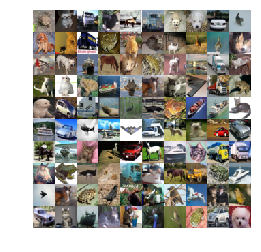

In [443]:
import pickle
import os
import matplotlib.pyplot as plt
import _pickle as cPickle
import sys  

DATA_PATH = '/home/exx/data/cifar10'
# CIFAR-10 data load utility

def unpickle(file):
    with open(os.path.join(DATA_PATH, file), 'rb') as fo:
        dict = cPickle.load(fo, encoding='latin1')
    return dict

def one_hot(vec, vals = 10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out
    
class CifarLoader(object):       
    def __init__(self, source_files):
        self._source = source_files
        self._i = 0
        self.images = None
        self.labels = None
        
    def load(self):
        data = [unpickle(f) for f in self._source]
        images = np.vstack([d["data"] for d in data])
        n = len(images)
        self.images = images.reshape(n, 3, 32, 32).transpose(0,2,3,1).astype(float)/255
        self.labels = one_hot(np.hstack([d["labels"] for d in data]), 10)
        return self
    
    def next_batch(self, batch_size):
        x, y = self.images[self._i:self._i+batch_size], self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size) % len(self.images)
        return x, y

class CifarDataManager(object):
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i) for i in range(1,6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    
    im = np.vstack(np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size))
    plt.imshow(im)
    plt.show()
        
    #im = np.vstack(np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size))
    #plt.imshow(img)
    #plt.show()
    
d = CifarDataManager()
print("Number of train images : {}".format(len(d.train.images)))
print("Number of train labels : {}".format(len(d.train.labels)))
print("Number of test images : {}".format(len(d.test.images)))
print("Number of test labels : {}".format(len(d.test.labels)))

images = d.train.images
labels = d.train.labels

display_cifar(images, 10)

In [444]:
# CIFAR-10 NN Model
cifar = CifarDataManager()
STEPS = 100

x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
y_ = tf.placeholder(tf.float32, shape = [None, 10])
#print(y_.shape)

keep_prob = tf.placeholder(tf.float32)

conv1 = conv_layer(x, shape = [5, 5, 3, 32])
conv1_pool = max_pool_2x2(conv1)
#print('conv1_pool', conv1_pool.shape)

conv2 = conv_layer(conv1_pool, shape = [5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)

conv3= conv_layer(conv2_pool, shape = [5, 5, 64, 128])
conv3_pool = max_pool_2x2(conv3)

conv4= conv_layer(conv3_pool, shape = [1, 1, 128, 256])
#conv4_pool = max_pool_2x2(conv3)
#print('conv2_pool', conv2_pool.shape)
conv4_flat = tf.reshape(conv4, [-1, 4 * 4 * 256])
print('conv4_flat', conv4_flat.shape)

conv_full = full_layer(conv4_flat, 1024)
print('conv_full', conv_full.shape)
full_1 = tf.nn.relu(conv_full)
print('full_1', full_1.shape)
full1_drop = tf.nn.dropout(full_1, keep_prob = keep_prob)
#print('full1_drop', full1_drop.shape)

y_conv = full_layer(full1_drop, 10)
print('y_conv', y_conv.shape)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y_conv))
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def test(sess):
    X = cifar.test.images.reshape(10, 1000, 32, 32, 3)
    Y = cifar.test.labels.reshape(10, 1000, 10)
    
    acc = np.mean([sess.run(accuracy, feed_dict={x : X[i], y_ : Y[i], keep_prob : 1.0}) for i in range(10)])
    print("step {}, accuracy {}".format(i, acc))
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(STEPS):
        batch = cifar.train.next_batch(100)
        #print('y_', batch[1].shape)
        #print('x', batch[0].shape)
        sess.run(train_step, feed_dict={x : batch[0], y_ : batch[1], keep_prob : 0.5})
                                        
    test(sess)


conv4_flat (?, 4096)
conv_full (?, 1024)
full_1 (?, 1024)
y_conv (?, 10)
step 99, accuracy 0.4156000018119812


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
